<a href="https://colab.research.google.com/github/FernandoZR83/ANN_DL_ML/blob/master/Classfication_NN_vs_LogisticReg_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NeuralNetwork vs LogisticsRegression on a Classfication Problem




### Packages ##

Let's first import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis. 
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- planar_utils provides sigmoid and plot_decision_boundary functions

In [2]:
!git clone 'https://github.com/FernandoZR83/ANN_DL_ML/'

Cloning into 'ANN_DL_ML'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 63 (delta 23), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (63/63), done.


In [0]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.linear_model
import os
import sys
from IPython.display import display

In [0]:
sys.path.append('ANN_DL_ML')
import planar_utils 

In [0]:
from planar_utils import plot_decision_boundary, sigmoid

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent over iterations

From sklearns datasets create a guassian quantiles dataset and load it into variables X and Y

In [0]:
def load_extra_datasets():  
    N = 200
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    return  gaussian_quantiles

X1 [ 4.14323519e-01 -2.33686257e+00  8.88723071e-02 -9.89198315e-01
  1.51480219e+00 -1.02051138e+00  1.12152768e-01 -1.97817346e-01
  1.83287089e+00 -7.33986379e-01 -2.24131248e-01  1.72835833e+00
 -1.58252808e-03  4.42982472e-01  9.48579572e-01  2.93287808e-01
  1.22328727e+00 -6.07078105e-01 -6.25117478e-01 -9.20844070e-01
 -8.54971122e-01  5.08272604e-02  1.01922988e-01  2.08160313e-01
  2.51140508e-01  5.19635069e-01  1.11716505e-02 -5.41249334e-01
  7.07948790e-01  1.45981426e+00  3.06495353e-01  9.46789073e-01
 -2.56188657e-01  5.53049251e-01  9.70808899e-01  7.01943885e-01
 -7.81369061e-01 -1.28744680e+00  4.29147877e-01  4.30941503e-01
 -1.56103186e-01 -2.73169079e-01 -1.14883237e+00 -9.20254831e-02
 -1.63196680e-01 -3.75441174e-01  3.85837568e-01  7.24051970e-01
  1.92511067e-01 -1.46911279e+00 -1.14157863e-01  1.56088458e-01
 -4.66433549e-01 -4.32632263e-01 -1.60501138e-01 -3.23749858e-02
 -9.36319119e-01  5.17506966e-01  2.64079143e-01  8.25227224e-01
 -1.19354190e+00  1.16

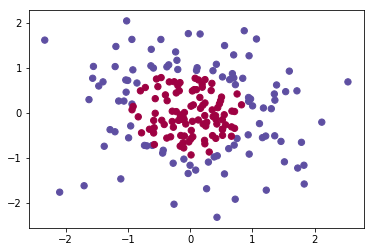

In [7]:

gaussian_quantiles= load_extra_datasets()
X, Y = gaussian_quantiles
X, Y = X.T, Y.reshape(1, Y.shape[0])
#X, Y = X.T, Y.reshape(1, Y.shape[0])
print("X1",X[0,:],"X2",X[1,:])
print("Y",Y[0,:])


# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y[0,:], s=40, cmap=plt.cm.Spectral);

In [8]:
shape_X = X.shape
shape_Y = Y.shape

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
#print ('No of Examples %d!' % (m))

The shape of X is: (2, 200)
The shape of Y is: (1, 200)


## Simple Logistic Regression

Before building a full neural network, lets first see how logistic regression performs on this problem. You can use sklearn's built-in functions to do that. Run the code below to train a logistic regression classifier on the dataset.

In [9]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


You can now plot the decision boundary of these models. Run the code below.

A PATA [[0.50920057 0.45727739 0.4434956  0.42464776 0.51931627]]
Model [[0.49079943 0.50920057]
 [0.54272261 0.45727739]
 [0.5565044  0.4434956 ]
 [0.57535224 0.42464776]
 [0.48068373 0.51931627]]
Model bin [1 0 0 0 1]
error [[0. 0. 0. 0. 0.]]
Intercecto:  [-0.01595924]
Pesos:  [[0.19035194 0.1785737 ]]
Accuracy of logistic regression: 55 % (percentage of correctly labelled datapoints)
[[0.19035194 0.1785737 ]]


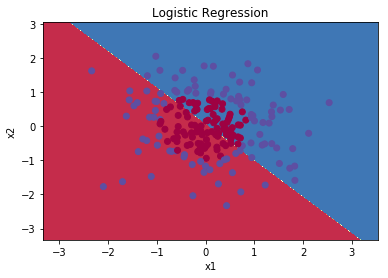

In [13]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y[0,:])
plt.title("Logistic Regression")

err=1/(1+np.exp(-clf.intercept_-np.dot(clf.coef_,X))) #paso de verificación de cálculo
errm=clf.predict_proba(X.T)
errt=err-errm[:,1] #verificación todo debe de dar cero
erro=clf.predict(X.T)
#hs=np.log(errt/(1-errt))

print("A PATA", err[:,0:5])
print("Model", errm[0:5])
print("Model bin", erro[0:5])
print("error",errt[:,0:5])
#print("error",hs[:,0:10])


wl=clf.coef_
inte=clf.intercept_
print("Intercecto: ", inte)
print("Pesos: ", wl)


# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")
print(clf.coef_)

**Interpretation**: The dataset is not linearly separable, so logistic regression doesn't perform well. Hopefully a neural network will do better. Let's try this now! 

### Now lets build a Neural Network model with one hidden layer


Beolow is the structure of the NN Model

    1. Define the neural network structure ( # of input units, # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)
    4. Then merge them into one function we call `nn_model()`. 
    Once we built `nn_model()` and learnt the right parameters,we    can make predictions on new data.

### 4.1 - Defining the neural network structure ####
    - n_x: the size of the input layer
    - n_h: the size of the hidden layer
    - n_y: the size of the output layer

In [0]:
#layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0] # size of input layer`
    n_h = 4
    n_y =Y.shape[0] # size of output layer
    return (n_x, n_h, n_y)

In [0]:
# initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
        
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [0]:
#forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2A = np.dot(W2,A1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [0]:
# Gcompute_cost

def compute_cost(A2, Y, parameters):
    """
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m    
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    
    return cost

In [0]:
# backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 

    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [0]:
# update_parameters


def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    
    # Update rule for each parameter

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

###  Combine all the above into a  nn_model() funcction ####

In [0]:
# nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [0]:
# predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X,parameters)
    predictions = A2 > 0.5
    ### END CODE HERE ###
    
    return predictions

Now we can run the Model on the entire data with 1 hidden layer (4 neurons) and 3000 epochs.

Cost after iteration 0: 0.693145
Cost after iteration 1000: 0.114260
Cost after iteration 2000: 0.118518
Cost after iteration 3000: 0.085100
Cost after iteration 4000: 0.081164
Parameters:  {'W1': array([[ 2.94199407,  1.7127156 ],
       [-0.25975301, -3.23081483],
       [-2.7792122 ,  1.42298269]]), 'b1': array([[1.64034835],
       [1.82606711],
       [1.7269789 ]]), 'W2': array([[-12.06237387, -12.98199695, -12.86784977]]), 'b2': array([[15.98685301]])}


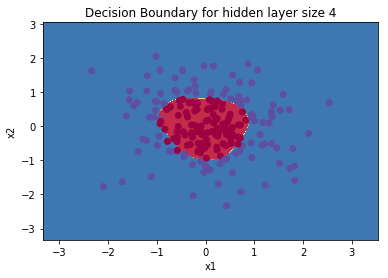

In [26]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 3, num_iterations = 5000, print_cost=True)
print("Parameters: ",parameters)
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0,:])
plt.title("Decision Boundary for hidden layer size " + str(4));

In [27]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 98%


In [31]:
print("Parameters: ", parameters)
A2, cache = forward_propagation(X, parameters)

yp=1/(1+np.exp(-(np.dot(parameters["W2"],np.tanh(np.dot(parameters["W1"],X)+parameters["b1"]))+parameters["b2"])))

dif=yp-A2
print(dif)
print("y_pred: ",yp.T)

Parameters:  {'W1': array([[ 2.94199407,  1.7127156 ],
       [-0.25975301, -3.23081483],
       [-2.7792122 ,  1.42298269]]), 'b1': array([[1.64034835],
       [1.82606711],
       [1.7269789 ]]), 'W2': array([[-12.06237387, -12.98199695, -12.86784977]]), 'b2': array([[15.98685301]])}
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
y_pred:  [[1.97762945e-06]
 [1.00000000e+00]
 [9.99972984e-01]
 [8.75176260e-01]
 [9.78305162

Accuracy is much hihher compared to Logistic Regression. The model has learnt the patterns well. 
Unilike logistic regressino,Neural networks are able to learn even highly non-linear decision boundaries.

Now, let's try out several hidden layer sizes.

Accuracy for 1 hidden units: 68.5 %
Accuracy for 2 hidden units: 80.5 %
Accuracy for 3 hidden units: 98.0 %
Accuracy for 4 hidden units: 98.5 %
Accuracy for 5 hidden units: 68.5 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


Accuracy for 20 hidden units: 98.0 %
Accuracy for 50 hidden units: 97.5 %


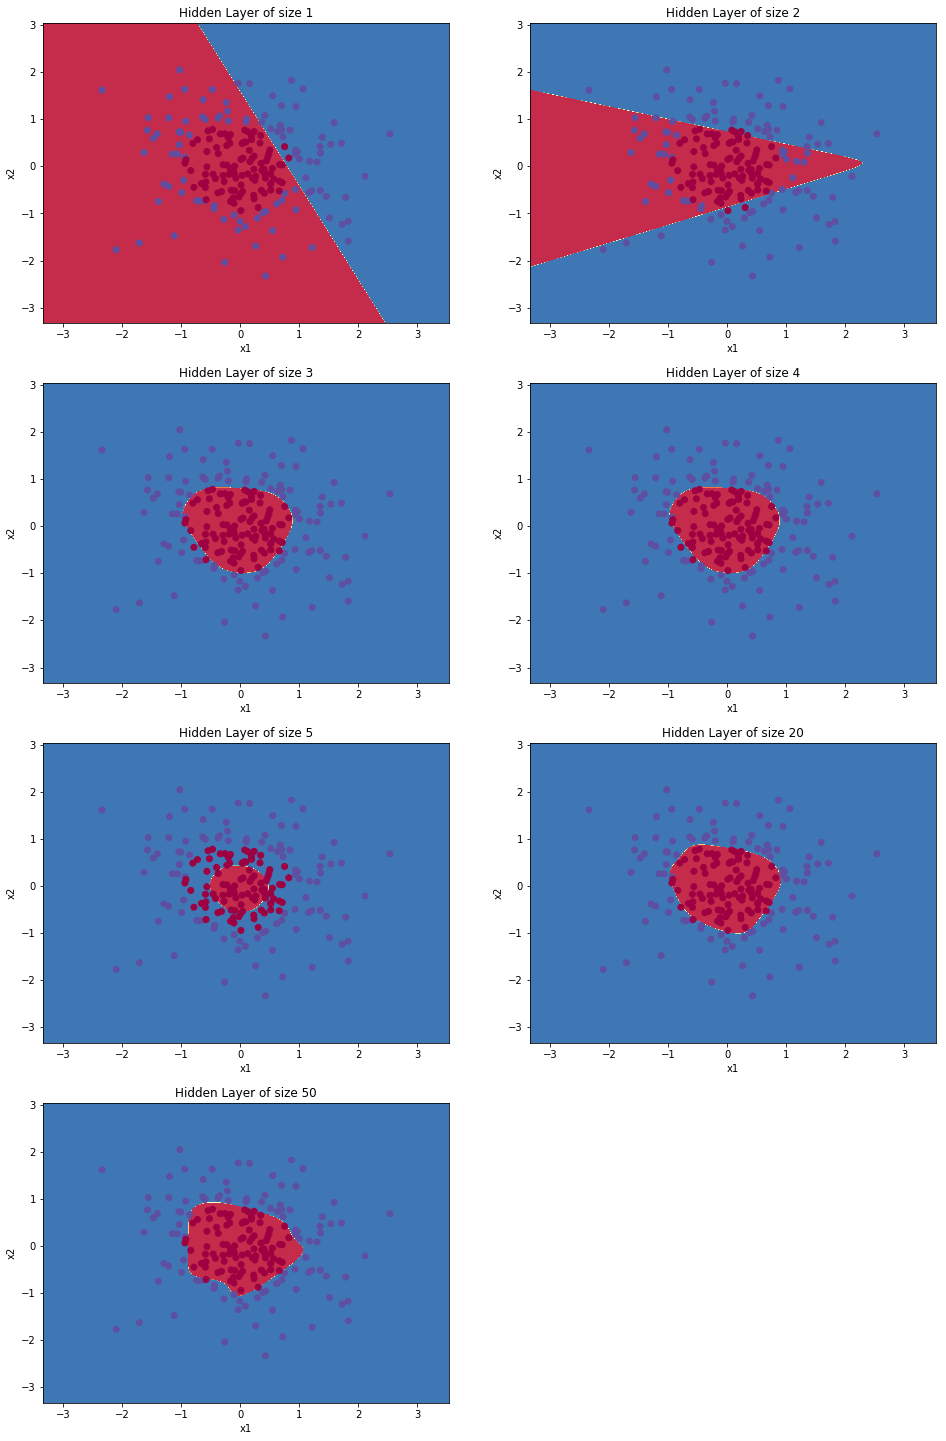

In [32]:
# Running the model with diffrent number of neurons in the hiddern layer

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0,:])
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

**Interpretation**:
- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data. 
- The best hidden layer size seems to be around n_h = 3. Indeed, a value around here seems to  fits the data well without also incurring noticable overfitting.
- We can see that at n_h = 50 the model seems overfitting. 

In [67]:
from sklearn.neural_network import MLPClassifier
output=Y[0,:]
print(output)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(4), random_state=1, activation = 'tanh')
print(clf.fit(X.T,output))
clf.coefs_[0]

print("weights between input and first hidden layer:")
print(clf.coefs_[0])
print("\nweights between first hidden and output layer:")
print(clf.coefs_[1])
print("Bias values for first hidden layer:")
print(clf.intercepts_[0])
print("Bias values for output hidden layer:")
print(clf.intercepts_[1])

predskex = clf.predict_proba(X.T)

predskex = clf.predict(X.T)
print(predskex.shape, output.shape)
print ('Accuracy: %d' % float((np.dot(output.T,predskex) + np.dot(1-output.T,1-predskex))/float(output.size)*100) + '%')

prob_pred_skex = clf.predict_proba(X.T)
yp_skex=sigmoid(np.dot(np.tanh(np.dot(X.T,clf.coefs_[0])+clf.intercepts_[0]),clf.coefs_[1])+clf.intercepts_[1])
 
print(yp_skex.T-prob_pred_skex[:,1].T)
#print(prob_pred_skex[:,1])
print(yp_skex)  
  

[0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0
 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0
 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1
 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0]
MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=4, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
weights between input and first hidden layer:
[[ 6.67036479 11.07321542 -5.98222766  1.60617103]
 [-4.23

In [69]:
from sklearn.neural_network import MLPClassifier
output=Y[0,:]

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(4,4), random_state=1, activation = 'tanh')
print(clf.fit(X.T,output))
clf.coefs_

print("weights between input and first hidden layer:")
print(clf.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(clf.coefs_[1])
print("\nweights between first hidden and second hidden layer:")
print(clf.coefs_[2])
print("Bias values for first hidden layer:")
print(clf.intercepts_[0])
print("Bias values for second hidden layer:")
print(clf.intercepts_[1])
print("Bias values for output hidden layer:")
print(clf.intercepts_[2])

predskex = clf.predict_proba(X.T)

predskex = clf.predict(X.T)
print(predskex.shape, output.shape)
print ('Accuracy: %d' % float((np.dot(output.T,predskex) + np.dot(1-output.T,1-predskex))/float(output.size)*100) + '%')

prob_pred_skex = clf.predict_proba(X.T)
yp_skex=sigmoid(np.dot(np.tanh(np.dot(np.tanh(np.dot(X.T,clf.coefs_[0])+clf.intercepts_[0]),clf.coefs_[1])+clf.intercepts_[1]),clf.coefs_[2])+clf.intercepts_[2])

print(yp_skex.T-prob_pred_skex[:,1].T)
  

MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 4), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
weights between input and first hidden layer:
[[ -3.98640637   3.05960529  -1.3329449   -7.82259806]
 [-13.88881895  -1.1895571   -3.83549746   2.33941828]]

weights between first hidden and second hidden layer:
[[  2.41572688   3.46406663  -8.38337779  -1.32193367]
 [-14.90699495  -3.07745888 -10.16808024   0.98629333]
 [ 11.44574506  -7.30560056  -8.0611145   -4.16663997]
 [ -3.59597593   8.71393432  -8.9856292   -1.53358621]]

weights between first hidden and second hidden layer:
[[ 16.77400928]
 [

Ejemplo con Tensorflow

In [85]:
import tensorflow as tf
input_size = 2
output_size = 1 #one per digit
hidden_layer_size = 4 #50 nodes per layer
#tf.keras.sequential is a function used to "stack layers"
#Our model's name is model
model = tf.keras.Sequential([
    #we need to flat images to get them a vector
    #First line in sequential function is used to delcare our input layer
    #tf.keras.layers.Flatten(input_shape = (28,28,1)),
    #tf.keras.layers.Dense(output_size) takes the inputs, provided to the model and calculates the dot product of the
    #inputs and the weights and adds the bias.
    #This is also where we can apply an activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),
    #We create the second hidden layer the same way
    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),
    #Output layer
    tf.keras.layers.Dense(output_size, activation = 'sigmoid')

])

model_customize = tf.keras.optimizers.SGD(learning_rate=0.035)
model.compile(optimizer=model_customize, loss='binary_crossentropy', metrics = ['accuracy'])
model.fit(X.T,output,epochs=300,verbose=2)
#model.summary()

print((X.T).shape, output.shape)

Epoch 1/300
200/200 - 0s - loss: 0.6991 - acc: 0.5050
Epoch 2/300
200/200 - 0s - loss: 0.6969 - acc: 0.5150
Epoch 3/300
200/200 - 0s - loss: 0.6954 - acc: 0.5200
Epoch 4/300
200/200 - 0s - loss: 0.6939 - acc: 0.5300
Epoch 5/300
200/200 - 0s - loss: 0.6926 - acc: 0.5250
Epoch 6/300
200/200 - 0s - loss: 0.6913 - acc: 0.5400
Epoch 7/300
200/200 - 0s - loss: 0.6905 - acc: 0.5350
Epoch 8/300
200/200 - 0s - loss: 0.6892 - acc: 0.5400
Epoch 9/300
200/200 - 0s - loss: 0.6880 - acc: 0.5550
Epoch 10/300
200/200 - 0s - loss: 0.6870 - acc: 0.5650
Epoch 11/300
200/200 - 0s - loss: 0.6863 - acc: 0.5700
Epoch 12/300
200/200 - 0s - loss: 0.6851 - acc: 0.5850
Epoch 13/300
200/200 - 0s - loss: 0.6842 - acc: 0.5950
Epoch 14/300
200/200 - 0s - loss: 0.6835 - acc: 0.5950
Epoch 15/300
200/200 - 0s - loss: 0.6827 - acc: 0.5900
Epoch 16/300
200/200 - 0s - loss: 0.6816 - acc: 0.6050
Epoch 17/300
200/200 - 0s - loss: 0.6809 - acc: 0.5950
Epoch 18/300
200/200 - 0s - loss: 0.6800 - acc: 0.5950
Epoch 19/300
200/20

In [86]:
print(model.layers[0].get_weights())
print(model.layers[0].get_weights()[0])
print(model.layers[1].get_weights())

#ysfpp=model.predict_proba(X.T)
ysfp=model.predict(X.T)
ysfpp=model.predict_proba(X.T)

yp_sfex=sigmoid(np.dot(np.tanh(np.dot(X.T,model.layers[0].get_weights()[0])+model.layers[0].get_weights()[1]),model.layers[1].get_weights()[0])+model.layers[1].get_weights()[1])

#W1sf=model.layers[0].get_weights()[0]
#print(W1sf, W1sf.shape)
#print(np.dot(X.T,model.layers[0].get_weights()[0])+model.layers[1].get_weights()[0].T)
#print(yp_skex.T)
#print(prob_pred_skex)
print(yp_sfex[0:10].T, "preditcion", ysfp[0:10].T)
print(yp_sfex.T-ysfp.T)

[array([[ 1.6391008 , -0.6220996 , -0.85114616, -1.3455703 ],
       [ 0.73034066, -1.8548511 ,  0.83218366,  0.9349065 ]],
      dtype=float32), array([0.92898124, 1.1660401 , 0.46022308, 1.0328568 ], dtype=float32)]
[[ 1.6391008  -0.6220996  -0.85114616 -1.3455703 ]
 [ 0.73034066 -1.8548511   0.83218366  0.9349065 ]]
[array([[-1.6047964 ,  0.5575995 ,  0.73133457, -0.8774067 ],
       [-1.4704943 ,  1.1867958 ,  0.3082065 , -0.12999403],
       [-0.04749728, -0.04642722,  1.20433   , -0.7114384 ],
       [ 0.1617884 ,  1.1121501 ,  1.4715451 , -0.23100181]],
      dtype=float32), array([ 0.8219349 , -1.1790379 , -0.1465211 ,  0.40969464], dtype=float32)]
[[0.14257572 0.95180682 0.29134049 0.68297786 0.08984423 0.79115729
  0.58892122 0.36598612 0.08728337 0.63380595]
 [0.66176525 0.25469232 0.45217904 0.64084099 0.37819419 0.28854098
  0.40157086 0.61473544 0.37632652 0.64084602]
 [0.77449113 0.84925686 0.29989929 0.85801548 0.15776264 0.93654904
  0.9399866  0.94561934 0.1464568  0.

In [87]:
import tensorflow as tf
input_size = 2
output_size = 1 #one per digit
hidden_layer_size = 4
hidden_layer_size1 = 8#50 nodes per layer
#tf.keras.sequential is a function used to "stack layers"
#Our model's name is model
model = tf.keras.Sequential([
    #we need to flat images to get them a vector
    #First line in sequential function is used to delcare our input layer
    #tf.keras.layers.Flatten(input_shape = (28,28,1)),
    #tf.keras.layers.Dense(output_size) takes the inputs, provided to the model and calculates the dot product of the
    #inputs and the weights and adds the bias.
    #This is also where we can apply an activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),
    #We create the second hidden layer the same way
    tf.keras.layers.Dense(hidden_layer_size1, activation='tanh'),
    #Output layer
    tf.keras.layers.Dense(output_size, activation = 'sigmoid')

])

model_customize = tf.keras.optimizers.SGD(learning_rate=0.035)
model.compile(optimizer=model_customize, loss='binary_crossentropy', metrics = ['accuracy'])
model.fit(X.T,output,epochs=300,verbose=2)
#model.summary()

print((X.T).shape, output.shape)

Epoch 1/300
200/200 - 0s - loss: 0.6940 - acc: 0.5150
Epoch 2/300
200/200 - 0s - loss: 0.6916 - acc: 0.5300
Epoch 3/300
200/200 - 0s - loss: 0.6883 - acc: 0.6150
Epoch 4/300
200/200 - 0s - loss: 0.6859 - acc: 0.5750
Epoch 5/300
200/200 - 0s - loss: 0.6834 - acc: 0.5100
Epoch 6/300
200/200 - 0s - loss: 0.6822 - acc: 0.5550
Epoch 7/300
200/200 - 0s - loss: 0.6796 - acc: 0.5450
Epoch 8/300
200/200 - 0s - loss: 0.6781 - acc: 0.5850
Epoch 9/300
200/200 - 0s - loss: 0.6767 - acc: 0.5950
Epoch 10/300
200/200 - 0s - loss: 0.6744 - acc: 0.5850
Epoch 11/300
200/200 - 0s - loss: 0.6728 - acc: 0.6000
Epoch 12/300
200/200 - 0s - loss: 0.6709 - acc: 0.6150
Epoch 13/300
200/200 - 0s - loss: 0.6697 - acc: 0.6150
Epoch 14/300
200/200 - 0s - loss: 0.6673 - acc: 0.6350
Epoch 15/300
200/200 - 0s - loss: 0.6661 - acc: 0.6350
Epoch 16/300
200/200 - 0s - loss: 0.6636 - acc: 0.6350
Epoch 17/300
200/200 - 0s - loss: 0.6621 - acc: 0.6350
Epoch 18/300
200/200 - 0s - loss: 0.6605 - acc: 0.6550
Epoch 19/300
200/20